In [21]:
import pandas as pd
from haversine import haversine_vector, Unit

In [23]:
stops_df = pd.read_csv(r"../Dataset/bus_stop.csv")

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_46508\2268917618.py:1: DtypeWarning: Columns (6,16,17,18,19,21,22,23,25,26,27,28,29,32,35,36,40,53,58,59,61) have mixed types. Specify dtype option on import or set low_memory=False.
  stops_df = pd.read_csv(r"../Dataset/bus_stop.csv")


In [76]:
gps_df = pd.read_csv(r"../Dataset/GPS.csv")

In [77]:
print(len(gps_df))
gps_df.head()

28246781


,DEVICE_ID,IST_DATE,LAT,LONGITUDE
0,181221399,2000-10-13 06:30:00,0.000000,77.701782
1,181221399,2000-10-13 06:30:00,0.000000,77.701782
2,181221399,2000-10-13 06:30:00,0.000000,77.701782
3,9999572791,2019-10-13 00:15:18,13.029256,77.593023
4,9999572791,2019-10-13 00:15:33,13.029256,77.593023


In [78]:
# Drop duplicate based on DEVICE_ID, IST_DATE, LAT and LONGITUDE
gps_df = gps_df.drop_duplicates(subset=['DEVICE_ID','IST_DATE','LAT','LONGITUDE'])

In [80]:
# Filter the rows which LAT and LONGITUDE are between 12 and 14 and 77 and 79
gps_df = gps_df[(gps_df['LAT'] > 12) & (gps_df['LAT'] < 14) & (gps_df['LONGITUDE'] > 77) & (gps_df['LONGITUDE'] < 79)]
print(len(gps_df))
gps_df.head()

25447194


,DEVICE_ID,IST_DATE,LAT,LONGITUDE,YEAR,DAY,DATE,TIME
3,9999572791,2019-10-13 00:15:18,13.029256,77.593023,2019,6,2019-10-13,00:15:18
4,9999572791,2019-10-13 00:15:33,13.029256,77.593023,2019,6,2019-10-13,00:15:33
5,9999572791,2019-10-13 00:15:46,13.029256,77.593023,2019,6,2019-10-13,00:15:46
6,9999572791,2019-10-13 00:16:03,13.029256,77.593023,2019,6,2019-10-13,00:16:03
7,9999572791,2019-10-13 00:16:18,13.029299,77.592891,2019,6,2019-10-13,00:16:18


In [ ]:
# Plot the data point based on year, Day and date
gps_df['IST_DATE'] = pd.to_datetime(gps_df['IST_DATE'])
gps_df['YEAR'] = gps_df['IST_DATE'].dt.year
gps_df['DAY'] = gps_df['IST_DATE'].dt.dayofweek
gps_df['DATE'] = gps_df['IST_DATE'].dt.date
gps_df['TIME'] = gps_df['IST_DATE'].dt.time

In [81]:
gps_df['DATE'].value_counts()

DATE
2019-10-13    25447188
2000-10-13           3
2001-10-13           2
1970-10-13           1
Name: count, dtype: int64

In [82]:
# Remove the data points which are not in 2019
gps_df = gps_df[gps_df['YEAR'] == 2019]

In [103]:
# Filter with respect to DEVICE_ID which having more than 1000 data points
gps_df = gps_df.groupby('DEVICE_ID').filter(lambda x: len(x) > 1000)

In [104]:
# Sort the dataframe by DEVICE_ID and then by IST_DATE
gps_df = gps_df.sort_values(by=['DEVICE_ID','IST_DATE'])
gps_df.head()

,DEVICE_ID,IST_DATE,LAT,LONGITUDE,YEAR,DAY,DATE,TIME,PREV_LAT,PREV_LONGITUDE,PREV_IST_DATE,DISTANCE,TIME_DIFF,SPEED
4050,150211826,2019-10-13 00:00:13,13.043971,77.594109,2019,6,2019-10-13,00:00:13,13.043971,77.594109,2019-10-13 00:00:03,0.0,10.0,0.0
5156,150211826,2019-10-13 00:00:23,13.043971,77.594109,2019,6,2019-10-13,00:00:23,13.043971,77.594109,2019-10-13 00:00:13,0.0,10.0,0.0
6241,150211826,2019-10-13 00:00:33,13.043971,77.594109,2019,6,2019-10-13,00:00:33,13.043971,77.594109,2019-10-13 00:00:23,0.0,10.0,0.0
7208,150211826,2019-10-13 00:00:43,13.043971,77.594109,2019,6,2019-10-13,00:00:43,13.043971,77.594109,2019-10-13 00:00:33,0.0,10.0,0.0
8146,150211826,2019-10-13 00:00:53,13.043971,77.594109,2019,6,2019-10-13,00:00:53,13.043971,77.594109,2019-10-13 00:00:43,0.0,10.0,0.0


In [84]:
# Shift the rows by 1 and get the previous row's LAT and LONGITUDE and IST_DATE
gps_df['PREV_LAT'] = gps_df.groupby(['DEVICE_ID'])['LAT'].shift(1)
gps_df['PREV_LONGITUDE'] = gps_df.groupby(['DEVICE_ID'])['LONGITUDE'].shift(1)
gps_df['PREV_IST_DATE'] = gps_df.groupby(['DEVICE_ID'])['IST_DATE'].shift(1)
gps_df.head()

,DEVICE_ID,IST_DATE,LAT,LONGITUDE,YEAR,DAY,DATE,TIME,PREV_LAT,PREV_LONGITUDE,PREV_IST_DATE
2916,150211826,2019-10-13 00:00:03,13.043971,77.594109,2019,6,2019-10-13,00:00:03,NaN,NaN,NaT
4050,150211826,2019-10-13 00:00:13,13.043971,77.594109,2019,6,2019-10-13,00:00:13,13.043971,77.594109,2019-10-13 00:00:03
5156,150211826,2019-10-13 00:00:23,13.043971,77.594109,2019,6,2019-10-13,00:00:23,13.043971,77.594109,2019-10-13 00:00:13
6241,150211826,2019-10-13 00:00:33,13.043971,77.594109,2019,6,2019-10-13,00:00:33,13.043971,77.594109,2019-10-13 00:00:23
7208,150211826,2019-10-13 00:00:43,13.043971,77.594109,2019,6,2019-10-13,00:00:43,13.043971,77.594109,2019-10-13 00:00:33


In [85]:
# Drop the na values
gps_df = gps_df.dropna()

In [86]:
# Calculate the distance between the current row and the previous row using haversine formula
gps_df['DISTANCE'] = haversine_vector(gps_df[['LAT','LONGITUDE']],gps_df[['PREV_LAT','PREV_LONGITUDE']],Unit.METERS)

In [87]:
# Calculate the time difference between the current row and the previous row
gps_df['TIME_DIFF'] = (pd.to_datetime(gps_df['IST_DATE']) - pd.to_datetime(gps_df['PREV_IST_DATE'])).dt.total_seconds()

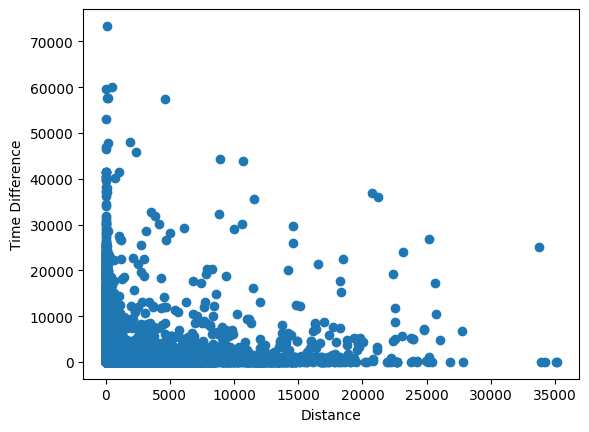

In [88]:
# PLot the distance and time difference
import matplotlib.pyplot as plt
plt.scatter(gps_df['DISTANCE'],gps_df['TIME_DIFF'])
plt.xlabel('Distance')
plt.ylabel('Time Difference')
plt.show()

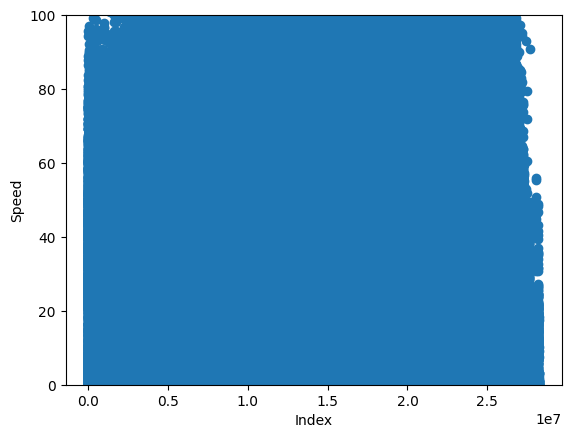

In [89]:
gps_df['SPEED'] = gps_df['DISTANCE'] / (gps_df['TIME_DIFF'] +0.0001) *18/5

# Plot the scatter plot speed with respect index
plt.scatter(gps_df.index,gps_df['SPEED'])
plt.ylim(0,100)
plt.xlabel('Index')
plt.ylabel('Speed')
plt.show()

In [92]:
# Value counts of speed
gps_df['SPEED'].value_counts()

11581426